<a href="https://colab.research.google.com/github/27priyanshu/Machine-Learning-Models/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

**Data Handling**

In [2]:
data=pd.read_csv("titanic.csv")


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [5]:
# To define X I can simply drop the collumn I don't need, which is the Y
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived
Y = data["Survived"] #Another way to declare: Y = data.Survived
Y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()


,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [9]:
#Some filles with the ages are empty. Checkin out the first 10 lines
X.Age[0:10]


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [11]:
#Now want data to training (80%) and testing (20%)
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Le

[     Pclass  Sex        Age
 829       1    1  62.000000
 597       3    0  49.000000
 828       3    0  29.699118
 541       3    1   9.000000
 680       3    1  29.699118
 ..      ...  ...        ...
 585       1    1  18.000000
 487       1    0  58.000000
 577       1    1  39.000000
 92        1    0  46.000000
 569       3    0  32.000000
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 382       3    0  32.000000
 723       2    0  50.000000
 334       1    1  29.699118
 757       2    0  18.000000
 537       1    1  30.000000
 ..      ...  ...        ...
 528       3    0  39.000000
 25        3    1  38.000000
 606       3    0  30.000000
 508       3    0  28.000000
 399       2    1  28.000000
 
 [179 rows x 3 columns],
 829    1
 597    0
 828    1
 541    0
 680    0
       ..
 585    1
 487    0
 577    1
 92     0
 569    1
 Name: Survived, Length: 712, dtype: int64,
 382    0
 723    0
 334    1
 757    0
 537    1
       ..
 528    0
 25     1
 606    0
 508  

In [12]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)


712

In [13]:
len(X_test)

179

In [14]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased
X_test

,Pclass,Sex,Age
410,3,0,29.699118
766,1,0,29.699118
155,1,0,51.000000
186,3,1,29.699118
522,3,0,29.699118
...,...,...,...
457,1,1,29.699118
598,3,0,29.699118
616,3,0,34.000000
744,3,0,31.000000


## **Data Analysis**

Linear Regression


In [15]:
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
model_lr = LinearRegression()

# Training the model
model_lr.fit(X_train, Y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_lr


array([ 0.06750779,  0.43211077,  0.34576247,  0.58746132,  0.06750779,
        0.0581806 ,  0.23237461,  0.10277178,  0.11087926,  0.23642835,
        0.0581806 ,  0.34981621,  0.06750779,  0.39440738,  0.28507327,
        0.43211077,  0.10682552,  0.92652214,  0.75232814,  0.58746132,
        0.61867157,  0.82112483, -0.01073302,  0.09061055,  0.06750779,
        0.09871803,  0.06628809,  0.07034183,  0.46332101,  0.43899856,
        0.21210589,  0.12304049,  0.43211077,  0.29306381,  0.06223435,
        0.58746132,  0.78475808,  0.8617792 ,  0.06750779,  0.09871803,
        0.25669707,  0.06750779,  0.3579237 ,  0.07439558,  0.07034183,
        0.76976281,  0.06750779,  0.10277178,  0.06750779,  0.15129975,
        0.64299402,  0.43211077,  0.43211077,  0.06750779,  0.36748586,
        0.27696578,  0.69974642,  0.13925546,  0.0581806 ,  0.76854311,
        0.68746825,  0.7766506 ,  0.11493301,  0.9508446 ,  0.93057589,
        0.6875852 ,  0.2972345 ,  0.99948952,  0.06750779,  0.06

In [19]:
from sklearn import metrics

# Mean Absolute Error (MAE)
mae_lr = metrics.mean_absolute_error(Y_real, y_pred_lr)
mae_lr



0.31575443054126906

In [18]:
# Mean Squared Error (MSE)
mse_lr = metrics.mean_squared_error(Y_real, y_pred_lr)
mse_lr



0.17219356520951856

In [20]:
# Root Mean Squared Error (RMSE)
rmse_lr = metrics.mean_squared_error(Y_real, y_pred_lr, squared=False)
rmse_lr

0.41496212503012675

In [21]:

# R-squared score
r2_lr = metrics.r2_score(Y_real, y_pred_lr)
r2_lr

0.2804833042673207

## **Logistic Reggresion**


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model_lr = LogisticRegression(solver='liblinear')

In [24]:
# Training
model_lr.fit(X_train,Y_train)


LogisticRegression(solver='liblinear')

In [25]:
y_pred_lg = model_lr.predict(X_test)
y_pred_lg


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0])

In [26]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_lg = model_lr.score(X_test,Y_real)
accuracy_lg


0.7430167597765364

In [27]:
# Here is another way to find the accuracy score
acc_lg = metrics.accuracy_score(Y_real,y_pred_lg)
acc_lg

0.7430167597765364

In [28]:
precision_lg = metrics.precision_score(Y_real,y_pred_lg)
precision_lg

0.7192982456140351

In [29]:
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg


0.5774647887323944

In [30]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[92, 16],
       [30, 41]])

<Axes: >

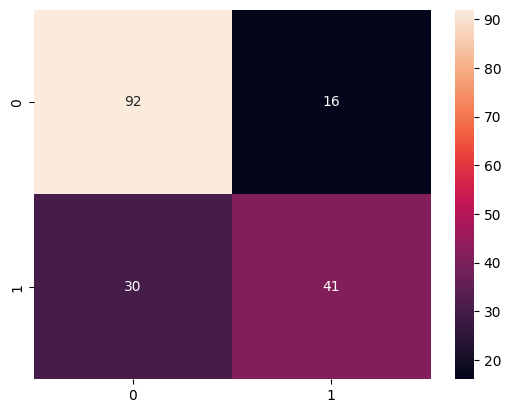

In [31]:
import seaborn as sns
sns.heatmap(cm_lg, annot=True)

## **Decision Tree**

In [32]:
model_dt = tree.DecisionTreeClassifier(max_depth=3)   #model with deph 3
model_dt


DecisionTreeClassifier(max_depth=3)

In [33]:
model_dt.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3)

In [34]:
model_dt.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0])

In [35]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0])

In [38]:
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
result



,Survided REAL,Survived PREDICTION
410,0,0
766,0,0
155,0,0
186,1,1
522,0,0
...,...,...
457,1,1
598,0,0
616,0,0
744,1,0


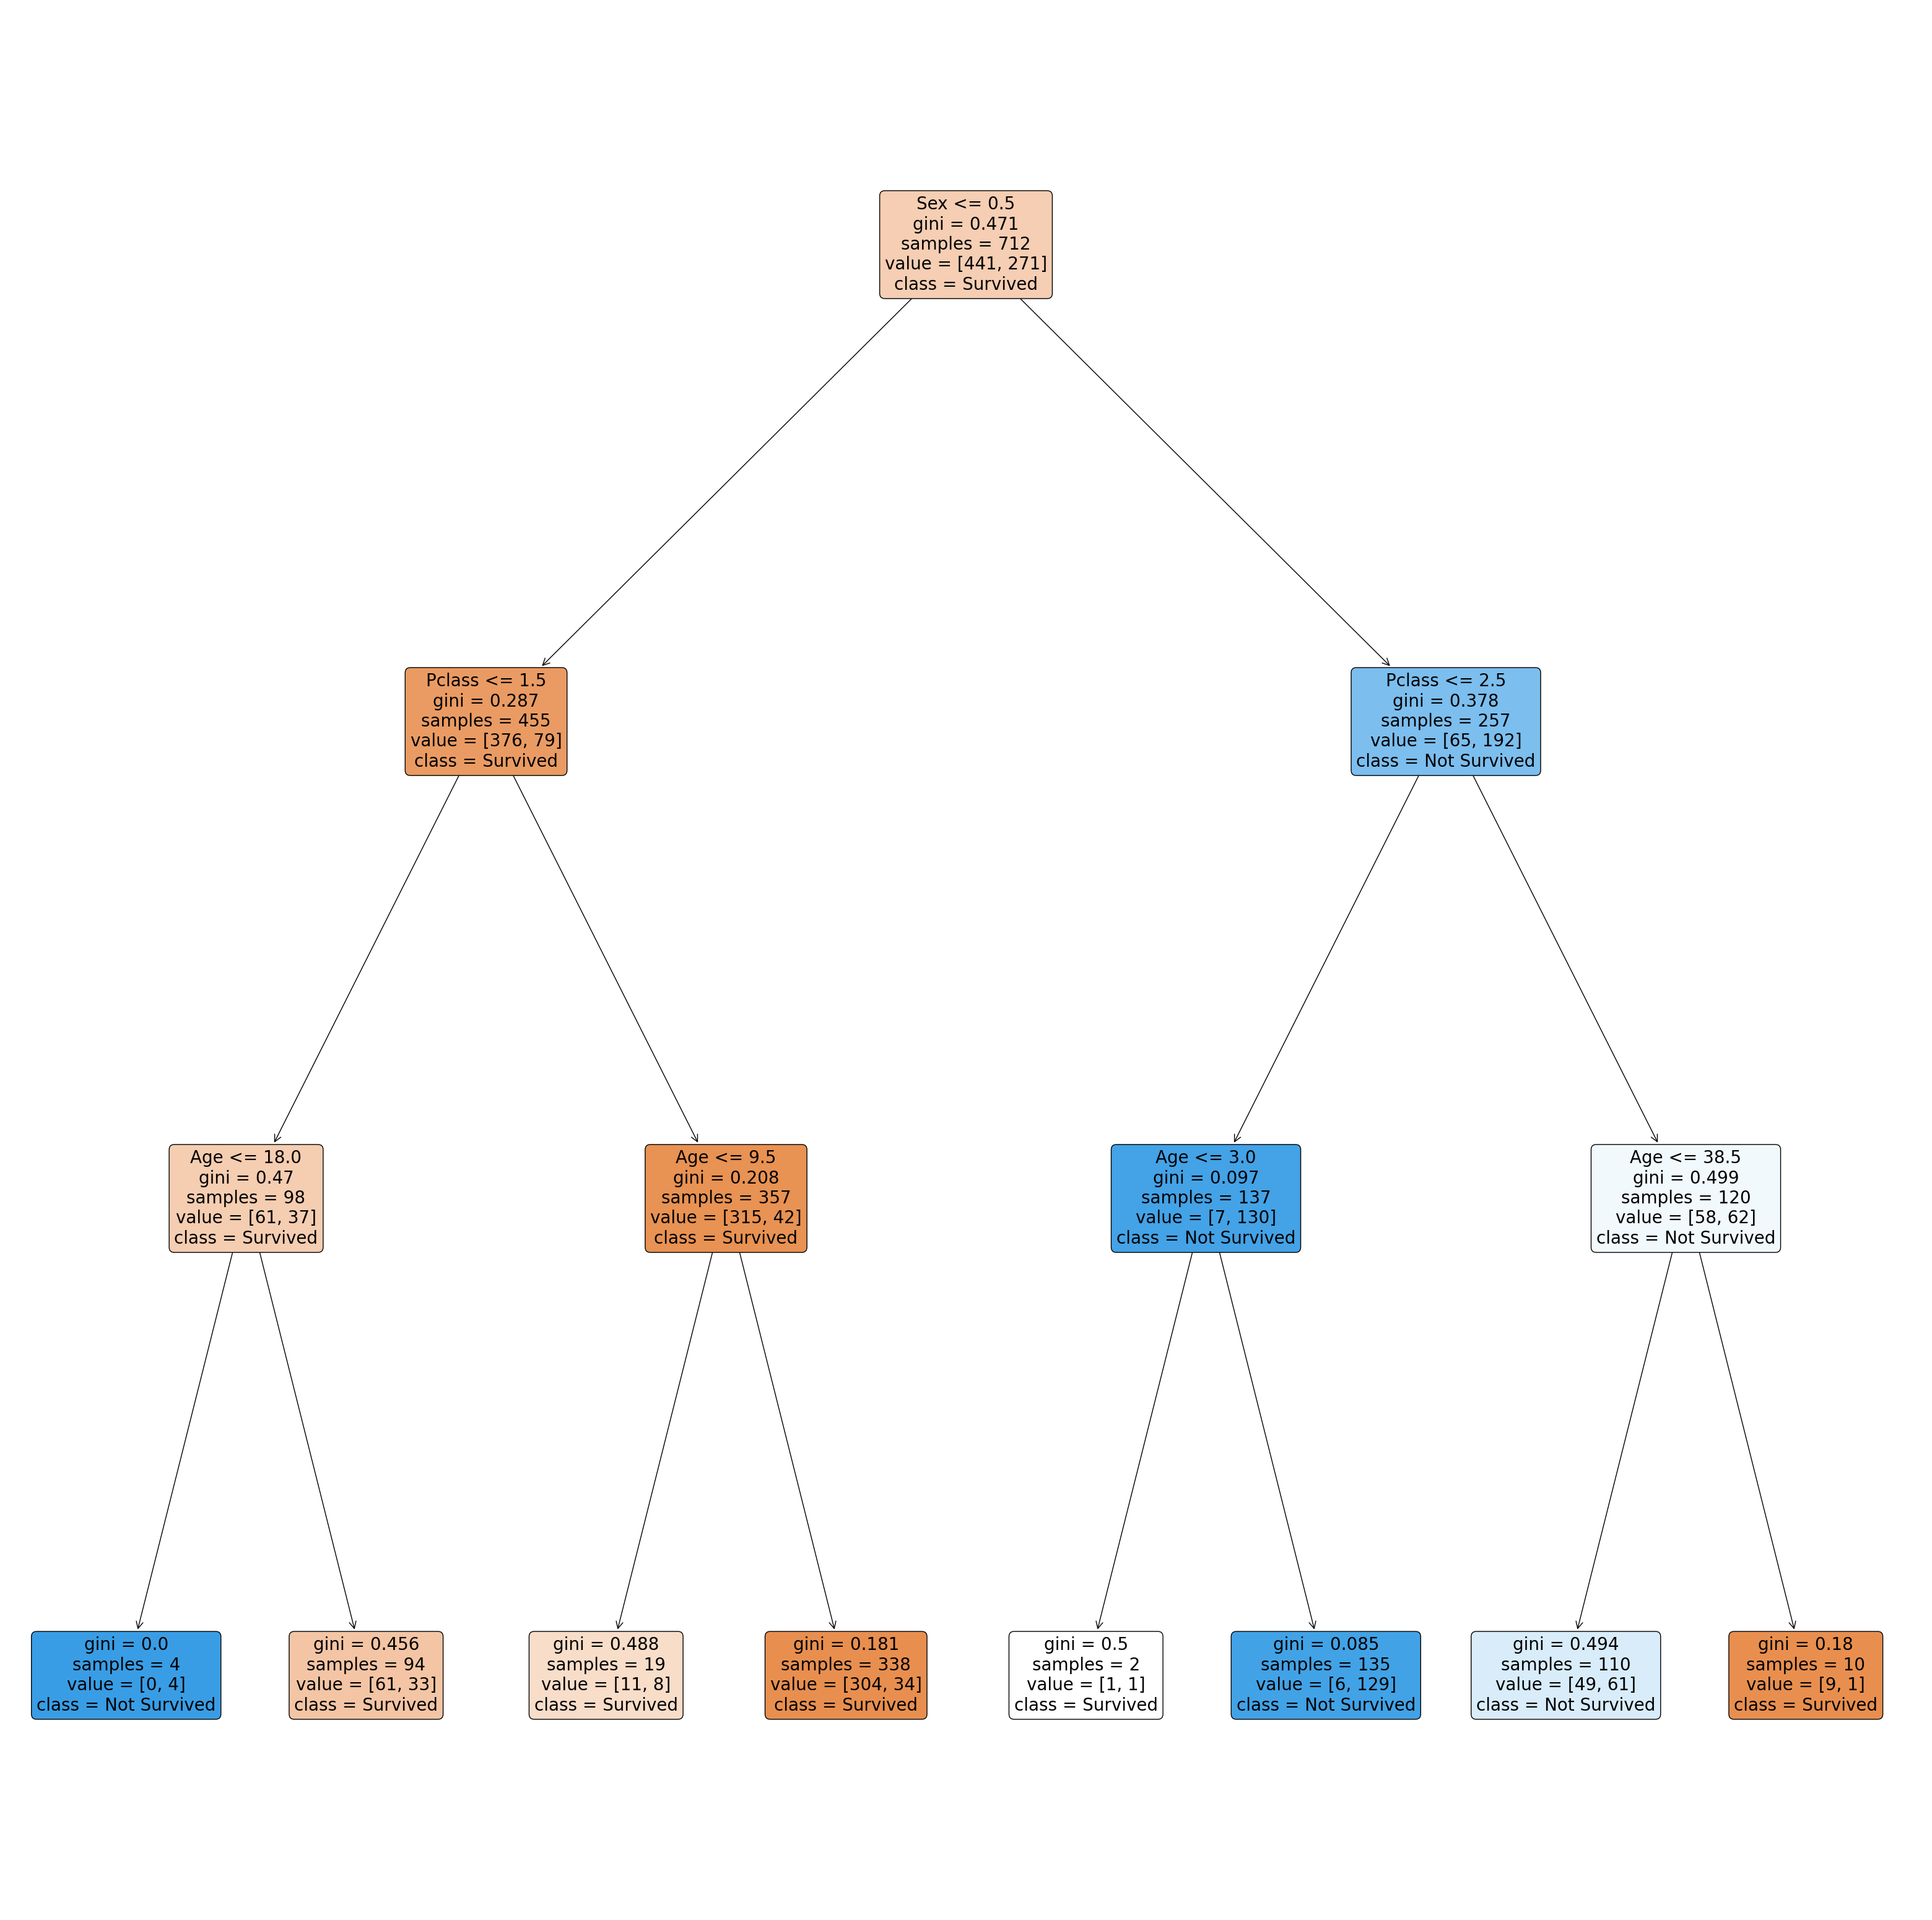

In [39]:
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

In [40]:
accuracy_dt = model_dt.score(X_test,Y_real)
accuracy_dt

0.7430167597765364

In [41]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)
accuracy


0.7430167597765364

In [42]:
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)
precision_dt

0.7272727272727273

In [43]:
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)
recall_dt

0.5633802816901409

In [44]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt


array([[93, 15],
       [31, 40]])

<Axes: >

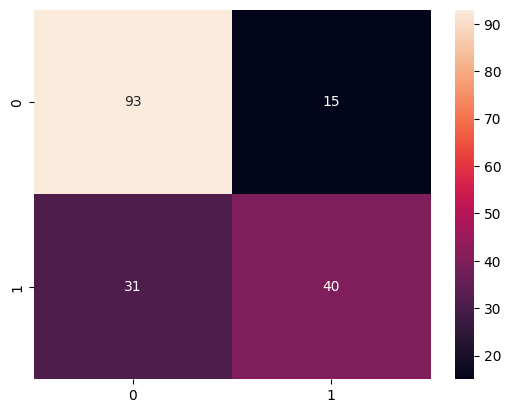

In [45]:
sns.heatmap(confusion_matrix_dt, annot=True)

## **Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(X_train,Y_train)

y_pred_forest = model_rf.predict(X_test)
y_pred_forest



array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0])

In [50]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest

0.8212290502793296

In [51]:
accuracy_forest = metrics.accuracy_score(Y_real,y_pred_forest)
accuracy_forest

0.8212290502793296

In [52]:
precision_forest = metrics.precision_score(Y_real,y_pred_forest)
precision_forest


0.7910447761194029

In [53]:
recall_forest = metrics.recall_score(Y_real, y_pred_forest)
recall_forest


0.7464788732394366

In [54]:
cm_forest = metrics.confusion_matrix(Y_real,y_pred_forest)
cm_forest


array([[94, 14],
       [18, 53]])

<Axes: >

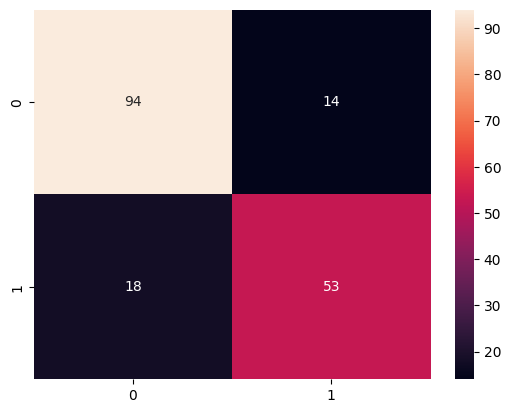

In [55]:
sns.heatmap(cm_forest, annot=True)